# Gradient Boosting: From Scratch!


## Below is how the predictions of a gradient boost model change as the predictions of each of the sub-models are added together.

![Gradient Boosting Image](https://github.com/ninja-josh/image-storage/raw/main/boosted_stumps.gif)

A gradient boosting machine learning. 

[(Image courtesy UC Business Analytics R Programming Guide)](http://uc-r.github.io/gbm_regression)

In [ ]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score

In [ ]:
#Custom function to plot predictions and evaluate a model
def plot_r2(X, y, y_pred):
  #plot true labels
  plt.scatter(X, y, label='True Values')
  #plot predicted labels
  plt.scatter(X, y_pred, label='Predicted Values')
  plt.legend()
  plt.xlabel('X')
  plt.ylabel('y')
  plt.show()
  #print R2 score
  print('\nR2 Score', r2_score(y, y_pred))

In [ ]:
#create data

df = make_regression(n_features=1, # 1 feature
                     n_informative=1, # 1 feature the correlates to target
                     n_targets=1, # 1 target
                     n_samples=1000, # 1000 Samples
                     random_state=42) # random state for reproducibility

Text(0, 0.5, 'y')

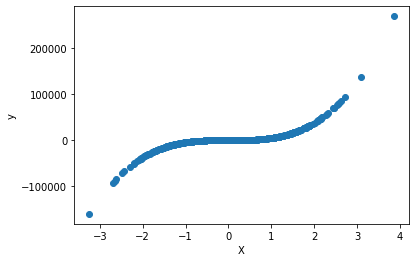

In [ ]:
X = df[0]
y = df[1]

#Let's make this interesting and make y a sine wave by cubing it
y = y**3

plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')

In [ ]:
# validation split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Simple Gradient Booster

# Training the Model

## Base Estimator

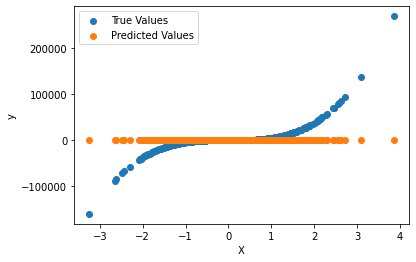


R2 Score 0.0


In [ ]:
#Create baseline regressor.  Since is is regression, we will use the mean

baseline = DummyRegressor(strategy='mean')
baseline.fit(X_train, y_train)
y_pred_1 = baseline.predict(X_train)
plot_r2(X_train, y_train, y_pred_1)

Start with a baseline of 0 R2

## Base Residuals

In [ ]:
#create pseudo-residuals
resid_1 = y_train - y_pred_1

## Weak Tree 1

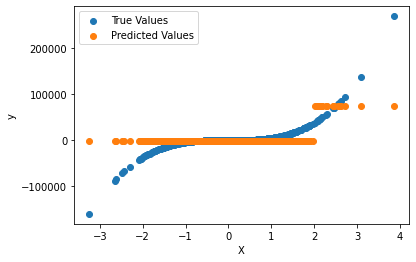


R2 Score 0.3853730211307187


In [ ]:
#Fit a depth 1 decision tree to use X_t to predict resid_1
tree_1 = DecisionTreeRegressor(max_depth=1)

tree_1.fit(X_train, resid_1)

y_pred_2 = tree_1.predict(X_train)

#add the predictions together
pred = y_pred_1 + y_pred_2

plot_r2(X_train, y_train, pred)


In [ ]:
#second residuals
resid_2 = resid_1 - y_pred_2
resid_2[:5]

array([3192.17867921, 5223.11364167,  680.49506866, 5804.86251365,
        901.45303729])

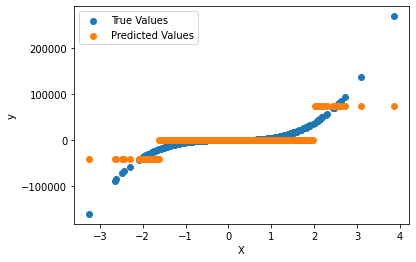


R2 Score 0.5839918105519601


In [ ]:
#Fit a depth 1 decision tree to use X_t to predict resid_2
tree_2 = DecisionTreeRegressor(max_depth=1)

tree_2.fit(X_train, resid_2)

y_pred_3 = tree_2.predict(X_train)

#3rd residuals
resid_3 = resid_2 - y_pred_3

#add the predictions together
pred = y_pred_1 + y_pred_2 + y_pred_3

plot_r2(X_train, y_train, pred)

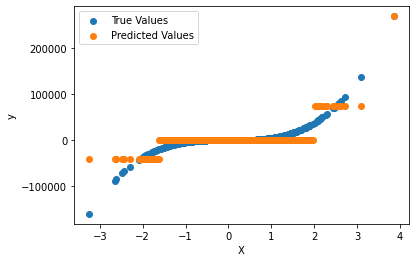


R2 Score 0.7190134633329139


In [ ]:
# One more time:
#Fit a depth 1 decision tree to use X_t to predict resid_3
tree_3 = DecisionTreeRegressor(max_depth=1)

tree_3.fit(X_train, resid_3)

y_pred_4 = tree_3.predict(X_train)

#4th residuals
resid_4 = resid_3 - y_pred_4

#add the predictions together
pred = y_pred_1 + y_pred_2 + y_pred_3 + y_pred_4

plot_r2(X_train, y_train, pred)

# Validation:

Simple Gradient Booster: 4 weak learners

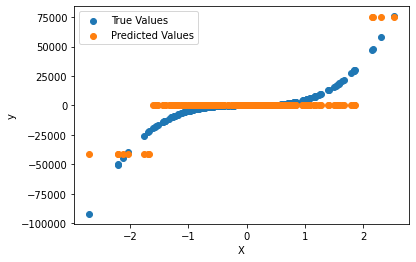


R2 Score 0.6072816856330459


In [ ]:
# Let's try our model on the test set.
# We will add up the predictions of each of our weak learners
weak_learners = [baseline, tree_1, tree_2, tree_3]
preds = []
for learner in weak_learners:
  preds.append(learner.predict(X_test))

final_pred = sum(preds)

plot_r2(X_test, y_test, final_pred)

Our very simple, very small boosted model is a little overfit, but it does successfully predict some of the variance in y_test.

When we use hundreds of learners, instead of just 4, we can get a much better result!

# XGBoost: 300 weak learners

[20:39:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


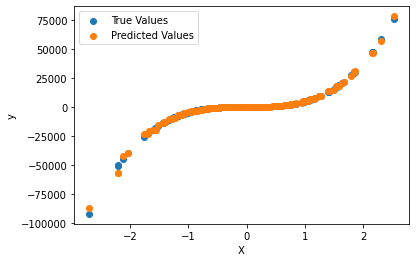


R2 Score 0.9963669284526002


In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=300, max_depth=1)

xgb.fit(X_train, y_train)

preds = xgb.predict(X_test)

plot_r2(X_test, y_test, preds)